<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_3/swan3.png" height="300" width="300"> 


# <center> R для тервера и матстата. <br>  <br> 3.3 Резкое погружение в финансовый мир. </center>

Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2017-2018). Автор ноутбука [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

---------

В этой тетрадке мы по резкому погрузимся в финансовый мир. Джордан Белфорт уже подготовил для нас батискаф. Этот блокнот будет очень серьёзным. В течение него мы проверим несколько гипотез. Они будут довольно специфичными. Вы пока ещё не очень хорошо разбираетесь в том, что такое проверка гипотез. Мы с вами посвятим этому через одну пару довольно много времени и постараемся разобраться что к чему. В этой тетрадке вам придётся просто верить мне на слово. В самом конце этого блокнота начнётся полный трэш. Я реалист и прекрасно понимаю, что там будет много вещей вам на вырост. Просто мне хотелось показать какие серьёзные вещи можно мутить в R и я их покажу. 

Перед тем как подняться на борт батискафа, подгрузим парочку пакетов. 

In [1]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

В финансах есть много разных инструментов: акции, облигации, деривативы и т.п.  В основе огромного бесчисленного числа современных экономических теорий лежит гипотеза о том, что движение котировок подчиняется логнормальному распределению. То есть доходности распределены нормально. На всём этом строится пресловутый Блэк-Шоулз с их Нобелевской премией. В реальности всё гораздо сложнее и нам предстоит в этом убедиться. Чтобы не быть голословным, будем изучать все на каких-нибудь примерах. Возьмем котировки компании Tesla Motors за 2015 год.


## 1. Добыча финансовых данных

Для того, чтобы погрузиться в мир финансов, нам нужно раздобыть финансовых данных. В R для всего есть пакеты, верно? Воспользуемся пакетом `quantmod`, чтобы достать данных с Yahoo.Finance. 

In [3]:
# install.packages("quantmod")  # Устанавливаем пакет, если его нет 
# Внимание: устанавливать пакет надо один раз в жизни! 
# После установки пакета можно эту строчку удалить навсегода. 

library("quantmod") # Эта команда подключает пакет
# Внимание: подключать пакет нужно каждый раз, когда
# вы хотите использовать его в своём скрипте

Получаем данные о котировках apple с сайта Yahoo. Команда `getSymbols` умеет делать это.

In [5]:
getSymbols("TSLA", from="2015-01-01", to="2016-01-01")

[1] "TSLA"

In [6]:
df <- TSLA  # Данные по акциям в таблицу df! 
head(df)    # Все данные дневные

           TSLA.Open TSLA.High TSLA.Low TSLA.Close TSLA.Volume TSLA.Adjusted
2015-01-02    222.87    223.25   213.26     219.31     4764400        219.31
2015-01-05    214.55    216.50   207.16     210.09     5368500        210.09
2015-01-06    210.06    214.20   204.21     211.28     6261900        211.28
2015-01-07    213.35    214.78   209.78     210.95     2968400        210.95
2015-01-08    212.81    213.80   210.01     210.62     3442500        210.62
2015-01-09    208.92    209.98   204.96     206.66     4591300        206.66

In [7]:
# зададим столбцам свои имена 
colnames(df) <- c('open', 'high', 'low', 'close', 'volume', 'adjusted')

df$time = 1:nrow(df) # Колонка под время для удобства
head(df)

             open   high    low  close  volume adjusted time
2015-01-02 222.87 223.25 213.26 219.31 4764400   219.31    1
2015-01-05 214.55 216.50 207.16 210.09 5368500   210.09    2
2015-01-06 210.06 214.20 204.21 211.28 6261900   211.28    3
2015-01-07 213.35 214.78 209.78 210.95 2968400   210.95    4
2015-01-08 212.81 213.80 210.01 210.62 3442500   210.62    5
2015-01-09 208.92 209.98 204.96 206.66 4591300   206.66    6

In [8]:
dim(df) # размеры таблички

[1] 252   7

Как видите, цены бывают разными. Открытия, закрытия, самая высокая и низкая. Давайте посмотрим на них на одной красивой картинке. По полю `colour` R будет создавать для графика легенду. Самая последняя строка отобразит эту лененду на картинке. Опция `alpha` задаёт прозрачность линий. Попробуйте поменять её ради фана. 

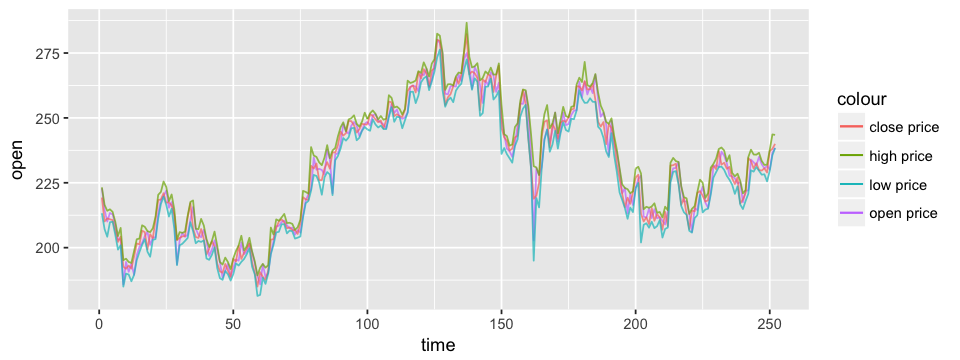

In [9]:
options(repr.plot.width=8, repr.plot.height=3)  # размер картинки (нужен только для тетрадки)

ggplot(df) +
  geom_line(aes(x = time, y = open,  colour = 'open price'), alpha = 0.7) +
  geom_line(aes(x = time, y = close, colour = 'close price'), alpha = 0.7) +
  geom_line(aes(x = time, y = high, colour = 'high price'), alpha = 0.7) +
  geom_line(aes(x = time, y = low, colour = 'low price'), alpha = 0.7) +
  scale_linetype_manual()

Забираем себе в долговременное пользование цены закрытия акций. Будем рисёрчить именно их. 

In [10]:
price <- as.numeric(df$open)
price[1:5]

[1] 222.87 214.55 210.06 213.35 212.81

Глянем на гистограмму для цен.

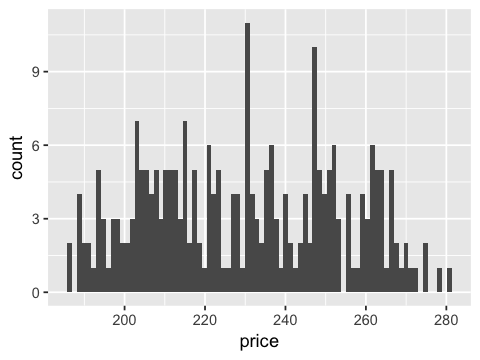

In [11]:
options(repr.plot.width=4, repr.plot.height=3)  # размер картинки
qplot(price, bins=80) 

Финансовые продукты характеризуются двумя основными характеристикам – доходностью и риском. С доходностью все довольно понятно – это процентное изменение стоимости за некоторый промежуток времени. Как найти годовую доходность? Это просто процентное изменение последней точки к первой:

In [12]:
tail(price, 1)/head(price, 1) - 1

[1] 0.07017544

Это много или мало? Почему?

Обычно экономические финансисты работают с доходностями. Для этого есть несколько причин. Часть из них теоретическая, часть практическая. Не будем разбираться в них. Просто перейдём от цен к доходностям, то есть к изменению цен:

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Команда `diff` вернёт нам вектор из приращений в каждой точке. 

In [13]:
diff(price)[1:5]

[1] -8.319992 -4.490005  3.290008 -0.540008 -3.890000

Хотелось бы теперь просто разделить его на значения цен, но нельзя - они разной длины. Поэтому придётся выбросить первый элемент из вектора цен. 

In [14]:
R <- diff(price)/price[-length(price)]
R[1:5]

[1] -0.03733114 -0.02092755  0.01566223 -0.00253109 -0.01827922

Посмотрим на распределение доходностей. Как это не странно, оно оказывается куполообразным. Издали распределение напоминает собой нормальное. Однако это ещё не факт. 

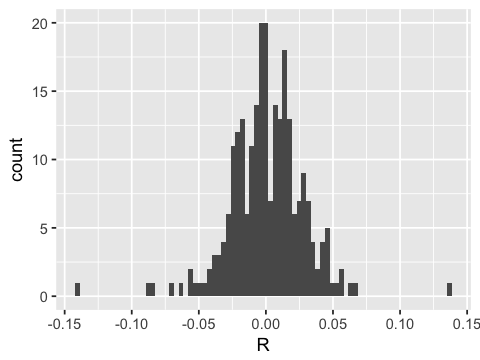

In [15]:
options(repr.plot.width=4, repr.plot.height=3) 
qplot(R, bins=80) 

Посмотрим на то как ряд из доходностей ведёт себя во времени.

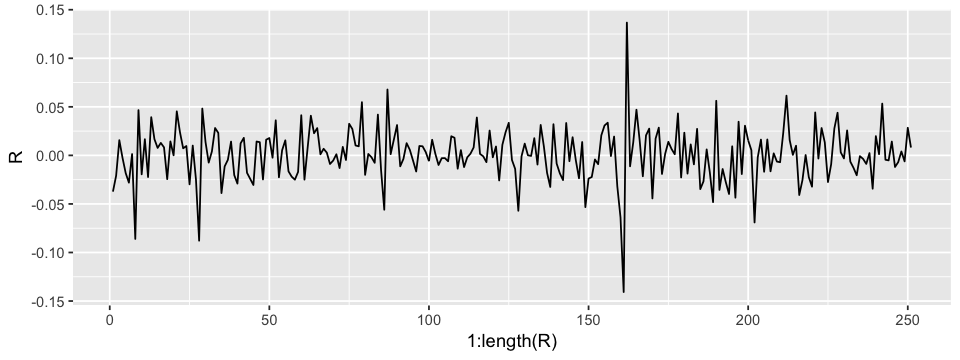

In [16]:
options(repr.plot.width=8, repr.plot.height=3) 
qplot(1:length(R), R, geom='line') 

Посмотрим на среднюю доходность по акциям. Интересно знать сколько в среднем зарабатывали владельци акций теслы за два года.

In [17]:
mean(R)

[1] 0.0006534686

Когда мы посмтотрели на распределение доходностей, у нас возник вопрос. А из какого это они распределения? На этот вопрос важно ответить перед тем как начать анализировать. На картинке распределение довольно куполообразно. Возможно, оно нормальное. Но это далеко не факт. Матстат не в состоянии дать однозначный ответ на этот вопрос. Никто не в состоянии дать однозначный ответ на этот вопрос. Однако, статистики 20 века придумали целый комплекс процедур, который позволяет утверждать что-то с определённой долей уверенности. Этот комплекс процедур состоит в проверки гипотез. Мы с вами ещё не говорили о гипотезах. Но если я здесь не вставлю кусочек с проверкой гипотезы, вы можете подумать что ничего проверять и не надо. На лекциях вам уже о них рассказывали, Поэтому давайте тоже проверим. Особо глубоко в гипотезы пока вдаваться не будем. Скоро мы начнём посвящать им и без того много времени. 

Итак, в нешем случае 

$$
\begin{aligned}
H_0 : & \text{ pяд доходностей имеет нормальное распределение} \\
H_1 : & \text{ pяд доходностей не распределён нормально.}
\end{aligned}
$$

Для проверки такой гипотезы существует довольно много тестов. Давайте воспользуемся тестом Шапиро-Вилка. Большая часть стандартных тестов уже встроена в R. Для той части, которая не является стандартной уже написана целая куча пакетов.

In [18]:
shapiro.test(R)


	Shapiro-Wilk normality test

data:  R
W = 0.94976, p-value = 1.302e-07


Команда, которая проводит тест выдала нам на выход какой-то странный протокол. В этом протоколе написано наблюдаемое значение статистики Шапиро-Вилка, а также p-значение. Что это за значение такое, мы узнаем через пару. Пока что просто знайте, что если оно меньше уровня значимости, гипотеза отвергается. Если оно больше уровня значимости, гипотеза не отвергается. В нашем случае p-значение меньше любого наперёд заданного разумного уровня значимости. Гипотеза о нормальности доходностей отвергается. 

Давайте попробуем понять в чём проблема. Гистограмма же такая куполообразная и милая! Для этого построим ещё одну картинку, которая называется диаграммой квантиль-квантиль. Она позволяет сравнить выборочное распределение переменной, которую мы исследуем с теоретическим. 

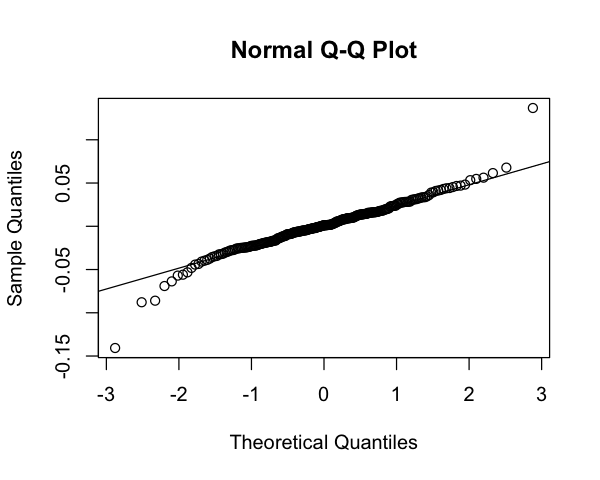

In [19]:
options(repr.plot.width=5, repr.plot.height=4)
qqnorm(R) # Рисуем график
qqline(R) # Добавляем линию квартилей

В этой диаграмме по оси $x$ откладываются значения из теоретического нормального распределения. По оси $y$ откладывают значения, которые фигурируют в выборке. Если бы нащи наблюдения были из нормального распределения, они бы оказались на прямой. Центр, в котором мы увидели куполообразность, действительно, укладывается на неё. А вот хвасты с неё спадают. В них то и вся соль. Они оказываются тяжелы.  

## 2. Доходность и риск

Мы поговорили о доходности. В ней не было ничего сложного. Но вот что считать мерой риска? Мы рассмотрим 4 популярные характеристики, а дальше сосредоточимся на двух.

## 2.1 Стандартное отклонение доходности 

Название говорит само за себя. Возьмём ряд доходностей, найжём его стандартное отклонение. 

In [20]:
sd(R)

[1] 0.02764276

А это много? Вкладываем деньги или нет? 

__NB:__ Сравнивать акции на основе стандартного отклонения можно при равных доходностях. А чтобы сравнивать разные акции нужно использовать комбинированные метрики. Например, Коэффициент Шарпа – отношение ожидаемой доходности к ее стандартному отклонению:

$$
SR = \frac{E(R) - R_f}{\sqrt{Var(R)}}
$$

В данной формуле $R_f$ это доходность от безрискового актива. Коэффициент Шарпа используется для определения того, насколько хорошо доходность актива компенсирует принимаемый инвестором риск. При сравнении двух активов с одинаковым ожидаемым доходом, вложение в актив с более высоким коэффициентом Шарпа будет менее рискованным.

In [21]:
mean(R)/sd(R)

[1] 0.02363978

Такой метод оценки риска хорош, так как прост и понятен, но есть пара минусов. Во-первых стандартное отклонение ничего не говорит об экстремальности распределения. Во-вторых, стандартное отклонение не естественно, то есть на интуитивном уровне не понятно.

## 2.2 Максимальная просадка 

__Максимальная просадка (maximum drawdown)__ – это то, насколько сильно просел наш актив после максимального влета. В R есть готовые способы найти максимальную просадку. Но мы же хотим все прочувствовать сами. Или не хотим. Не все хотят. Но обычно, чтобы до конца понять какой-то алгоритм, нужно самостоятельно его запрогать. Алгоритм:

1. Говорим, что максимальная просадка равна 0.
2. Берем первую точку и объявляем ее максимумом цены.
3. Идем к следующей точке.
    * Если она больше максимума, то обновляем максимум.
    * Если меньше, то считаем в ней просадку. Если просадка больше максимальной, то обновляем максимальную
4. Повторяем шаг 3, пока не дойдем до конца.

In [22]:
maxDD <- 0
maxPr <- price[1]

for (i in 2:length(price)) { # Проходим по всем точкам, начиная со второй
  if (price[i] > maxPr) { # Проверяем не больше ли она текущего максимума
    maxPr <- price[i] # Если больше, то меняем максимум на эту точку
  } else {
    DD <- (maxPr - price[i])/maxPr # А иначе считаем просадку
    if (DD > maxDD) { # И смотрим не больше ли эта просадка максимальной
      maxDD <- DD # А если больше, то меняем значение максимальной просадки
      }
  }
}
maxPr

[1] 280.2

In [23]:
maxDD

[1] 0.276267

Чем хороша эта мера? А чем плоха?



## 2.3 Value-at-Risk

… или статистика $16:15$. Value-at-Risk на каком-либо уровне (скажем, $5\%$) – это просто квантиль на уровне $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше. Вот если сейчас не понятно, то точно стоит меня прервать. Считаем ее элементарно:

In [24]:
quantile(R, 0.05)

5% 
-0.03928998

Или способ для более продвинутых юзеров:

In [25]:
sort(R)[0.05*length(R)]

[1] -0.04081724

VaR хорош, так как не требует гипотез о хоть какой-либо форме распределения и описывает именно ту часть распределения, которую мы боимся. Но VaR - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$?…

## 2.4 Expected shortfall

Он же ES, conditional value at risk (CVaR), average value at risk (AVaR), и expected tail loss (ETL). Но мы будем говорить ES. ES - Это среднее значение по всем тем точкам, что оказались левее VaR, То есть среднее по худшим $5\%$. Считаем:

In [26]:
(R <= quantile(R, 0.05))[1:10] # сделаем срез по всем доходностям меньше VaR

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE

In [27]:
mean(R[R <= quantile(R, 0.05)]) # И просто посчитаем по ним среднее

[1] -0.06385995

Чем ES хуже VaR? А чем лучше?

## 2.5 Кто побеждает? 

Да никто. Все рассуждения о риске – это попытки запихнуть функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. В лучшем случае посредственны. А к чему это приведет, можно прочитать [в этой книге](https://yadi.sk/i/Zzqyy7OH3Rx3TG) (обязательно к прочтению для тех, кто видит себя трейдером, и занятное чтиво для остальных).

Попробуем чуть глубже вникнуть в VaR и ES. Вот мы уже умеем находим VaR и понимаем, что это такое. Взяли цены акций за год, нашли квантиль $5\%$. И говорим, что в будущем акции будут вести себя так же. То есть занимаемся моделированием, предсказанием, алхимией. А значит нужно научиться проверять наши прогнозы.

## 3. Тренировочная и тестовая выборка

Но сначала о методологии анализа данных. Если вы занимаетесь моделированием чего угодно на данных, то вам нужно иметь две выборки: тренировочную и тестовую. На тренировочной вы строите модель, а на тестовой должны проверить ее качество. Давайте на примерах.

## 3.1 Кривая VaR

Поэтому когда мы найдем значение VaR, то верифицировать его мы должны будем на другой части наблюдений. У нас есть

In [28]:
length(R)

[1] 251

наблюдения. Давайте на первых 150-ти наблюдениях найдем VaR, а на оставшихся его оценим.

Разбиваем на две выборки:

In [29]:
train <- R[1:150]
test  <- R[151:length(R)]

In [30]:
var <- quantile(train, 0.05)
var

5% 
-0.03160941

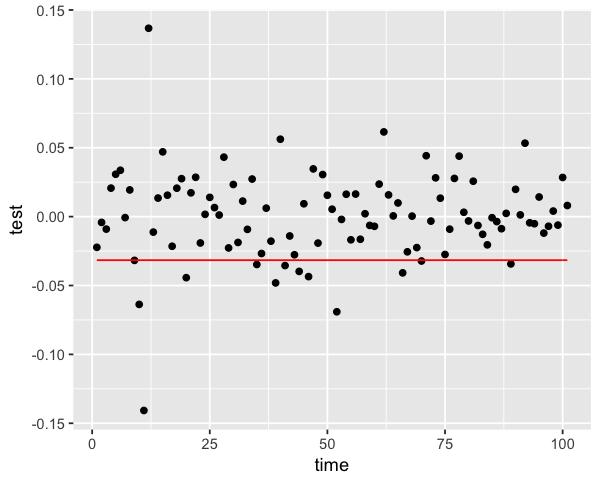

In [31]:
df_plot = data.frame(time = 1:length(test), test = test)

ggplot(df_plot, aes(x = time)) + 
    geom_point(aes(y = test)) + 
    geom_line(aes(y = var), color = 'red')

Мы видим, что на деле довольно большое число точек попало ниже нашего значения $VaR$. Мы думали, что такое произойдёт только в $5\%$ слачаев. А произошло в 

In [32]:
round(length(test[test < var])/length(test) * 100)

[1] 13

процентах случаев. Вопрос: можно ли считать такой прогноз точным? 

## 3.2 Тест Купика

Ответ: хз. Надо проверять гипотезу. Тест для проверки этой гипотезы может вам показаться сложным. Вот он. Пусть $K$ это число пробитий $VaR$ -  $\sum(R_t < VaR_t)$, а доля пробитий $\alpha_o = \frac{K}{L}$, где $L$ - число наблюдений в тестовой выборке. Гипотеза теста выглядит следующим образом:

$$
\begin{aligned}
H_0 : & \alpha_0 = \alpha \\
H_1 : & \alpha_0 \ne \alpha
\end{aligned}
$$

Статистика для проверки гипотезы устрашает: 

$$
S = 2 \cdot \ln((1-\alpha_0)^{T-L} \cdot \alpha_0^L) - 2 \cdot \ln((1 - \alpha)^{T - L} \cdot \alpha^L).
$$

Она не только устрашает, но ещё и имеет хи-квадрат распределение с одной степенью свободы. Если вы внимательно приглядитесь к этой статистике, вы сможете разглядеть тест отношений правдоподобий. 

Теперь мы вооружены и можем провести тест! 

In [33]:
L <- length(test)
K <- sum(test < var)
a0 <- K/L
a <- 0.05
S <- 2*log( (1-a0)^(L-K) * a0^K ) - 2*log( (1-a)^(L-K) * a^K )
pval <- 1 - pchisq(S, 1)
pval

[1] 0.002214968

P-значение оказалось очень низким. Гораздо меньше любого разумного уровня значимости. А значит мы отвергаем нулевую гипотезую $VaR$ найден не очень хорошо. 

## 3.3 Почему всё это плохо? 

А потому, что мы не расширяем обучающую выборку, то есть не учитываем новую информацию. Мы один раз предсказали $VaR$ и так с ним и сидим. Давайте сделаем чуток лучше. 

Теперь мы выделим $N$ точек, найдём по ним $VaR$ для $N+1$ точки, а затем сдвинемся вправо и по $N+1$ точке найдём $VaR$ для $N+2$ точки. В итоге $VaR$ будет в каждой точке разный. На коде будет понятнее:

In [34]:
N <- 70 # Длина тренировочной выборки. возьмем меньше, чтобы отличалось.
test <- R[(N+1):length(R)] # Тестовая выборка
VaR <- rep(0, length(test)) # Запишем сюда пока нули.
for (i in (N+1):length(R)){
  train <- R[(i-N):(i-1)]
  VaR[i-N] <- quantile(train, 0.05)
}

А теперь нарисуем:

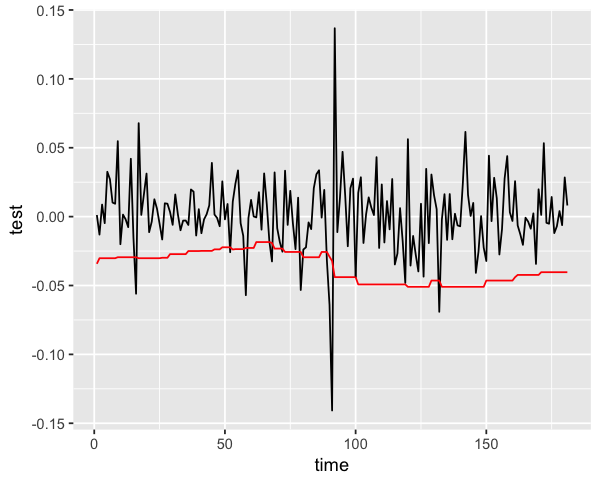

In [35]:
df_plot = data.frame(time = 1:length(test), test = test, VaR=VaR)

ggplot(df_plot, aes(x = time)) + 
    geom_line(aes(y = test)) + 
    geom_line(aes(y = VaR), color = 'red')

Видали? Получилась кривая $VaR$! Что нужно сделать теперь? Верно, провести тест Купика. Не хочу загромождать текст. Скажу, что получается $p = 0.52$. Лучше, чем было раньше. Ожидаемо? Почему? 

## 4. Систематизируем знания! 

То, что мы делали до этого момента, называется историческим способом оценки $VaR$. Нужен квантиль $5\%$? Вот и бери $5\%$ худших значений. Работает? да. Но как-то неинтересно. Давайте теперь по-настоящему моделировать. Например, я решу, что мое распределение доходностей нормальное. Выше мы с вами обсудили, что это надо бы проверить. И даже проверили.  И выяснили, что это не так. Скажу больше, чаще всего это не так. 

Давайте сделаем вид, что мы плохие исследователи, которые не проверяют предпосылки и слепо верят в нормальные распределения на фондовых рынках. 

Доходности нормально распределены. Тогда мне нужно искать $VaR$ в каждой точке чуть-чуть по другому: взять последние $N$ точек, подогнать под них нормальное распределение и найти его квантиль. Подогнать нормальное распределение просто: нужно взять распределение с таким же средним и дисперсией. Утверждается, что оно максимально хорошо описывает точки. С чего бы это?

Сначала сравним VaR новым и старым методом на всех данных:

In [36]:
quantile(R, 0.05)  # Исторический подход

5% 
-0.03928998

In [37]:
qnorm(0.05, mean=mean(R), sd=sd(R)) # новый уровень де***a

[1] -0.04481482

Похоже? Нет? Теперь построем кривую $VaR$!

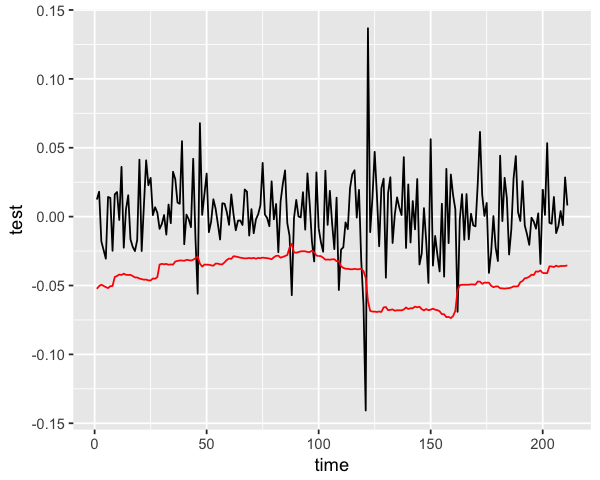

In [38]:
N <- 40
test <- R[(N+1):length(R)]
VaR <- rep(0, length(test))
for (i in (N+1):length(R)){
  train <- R[(i-N):(i-1)]
  VaR[i-N] <- qnorm(0.05, mean=mean(train), sd=sd(train))
}

df_plot = data.frame(time = 1:length(test), test = test, VaR=VaR)

ggplot(df_plot, aes(x = time)) + 
    geom_line(aes(y = test)) + 
    geom_line(aes(y = VaR), color = 'red')

И тест Купика!

In [39]:
L <- length(test)
K <- sum(test < VaR)
a0 <- K/L
a <- 0.05
S <- 2*log( (1-a0)^(L-K) * a0^K ) - 2*log( (1-a)^(L-K) * a^K )
pval <- 1 - pchisq(S, 1)
pval

[1] 0.2334885

Чем метод лучше исторического? А чем хуже? Дополнительный вопрос для тех, кто читал "Чёрного Лебедя": А что вообще про всё это думает Талеб? 

## 5. Быстрое знакомство с ограми

__Внимание!__ Ниже будет происходить полный трэшак, который мозг среднестатистического второкурсника не переварит. 

Это огр: 

![](http://multhero.ru/wp-content/uploads/2013/10/shrek.jpg)

А это ОГР: 

$$
f(x) = \frac{(\gamma/\delta)^\lambda}{\sqrt{2\pi}K_\lambda(\delta \gamma)} \; e^{\beta (x - \mu)} \cdot \frac{K_{\lambda - 1/2}\left(\alpha \sqrt{\delta^2 + (x - \mu)^2}\right)}{\left(\sqrt{\delta^2 + (x - \mu)^2} / \alpha\right)^{1/2 - \lambda}},
$$

где 

$$
K_{\alpha}(z) = \frac{\pi}{2 \cdot \sin(\alpha \pi)} [I_{-a}(z) - I_a(z)],
$$

где 

$$
I_a(z)  = \sum_{k=0}^{\infty} \frac{(\frac{z}{2})^{2k + a}}{k! \cdot \Gamma(k + a + 1)},
$$

где 

$$
\Gamma(z) = \int_0^{\infty} t^{z-1} e^{-t} dt.
$$

Это формула плотности вероятности Обобщённого Гиперболического Распределения. Какая была проблема с нормальным распределением? Хвосты плохо описывало да ассиметрию не поддерживало. ОГР умеет почти всё. У него целых 5 параметров: $\lambda$, $\alpha$, $\beta$, $\delta$, $\mu$ и $\gamma = \sqrt{\alpha^2 - \beta^2}$  для простоты  формулы (хаха).

Собственно Гаусс, Стьюдент, обратный Гаусс, обратное Хи-квадрат и многое другое - это всё частные случаи ОГР. И раз мы не смогли хорошо подогнать гауссиану, то ОГР то точно сможем! За работу с этим огромным классом распределений  в R отвечает пакет `ghyp`. Его нужно установать и подключить. 

In [41]:
# install.packages("ghyp")
library("ghyp")

В нём есть довольно много хороших функций. Функции для подгонки: `fit.*uv` - для подгонки одномерных распределений, `fit.*mv` - для подгонки многомерных распределений, где `*` это `gauss`, `ghyp`, `hyp`, `NIG`, `t` и `VG` для разных распределений. 

Так как мы очень крутые, то подгоним сразу самое общее распределение под наши данные:

In [42]:
ghyp_dist <- fit.ghypuv(R, silent = TRUE)
summary(ghyp_dist)


Asymmetric Generalized Hyperbolic Distribution:

Parameters:
      lambda    alpha.bar           mu        sigma        gamma 
-2.420002301  0.069852875  0.002814606  0.027191472 -0.002094913 

Call:
fit.ghypuv(data = R, silent = TRUE)

Optimization information:
log-Likelihood:                561.189 
AIC:                           -1112.378 
Fitted parameters:             lambda, alpha.bar, mu, sigma, gamma;  (Number: 5)
Number of iterations:          502 
Converged:                     FALSE 
Error code:                    1 
Error message:                  


Что-то оно не сошлось. Но это не значит, что параметры не определены. Смотрим на результат:

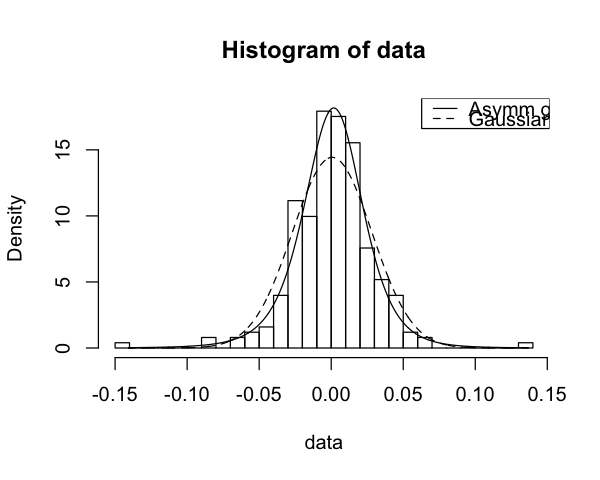

In [43]:
hist(ghyp_dist)

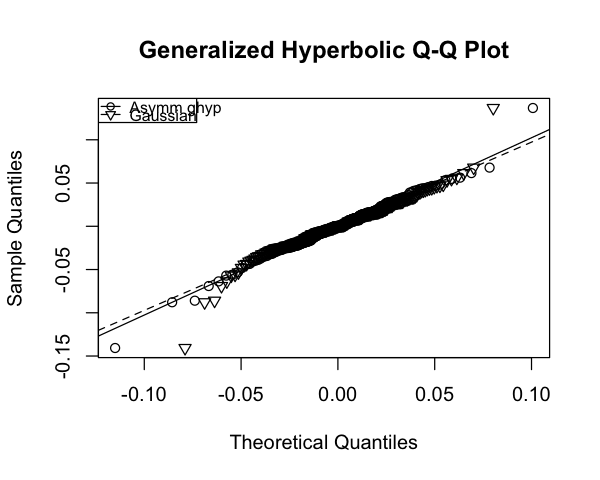

In [44]:
qqghyp(ghyp_dist)

Но может ОГР эо слишком? И стьюдент был бы лучше? Или NIG? Для этого есть информационный критерий Акаике, $AIC = 2k - 2 \cdot ln(L),$ где $k$ - количество параметров, а $L$ - правдоподобие.

In [45]:
aic <- stepAIC.ghyp(R, dist=c("ghyp", "hyp", "t", "gauss"), silent=TRUE)

Currently fitting: asymmetric ghyp 
Currently fitting: asymmetric hyp 
Currently fitting: asymmetric t 
Currently fitting: symmetric ghyp 
Currently fitting: symmetric hyp 
Currently fitting: symmetric t 
Currently fitting: gauss


In [46]:
aic$best.model

Symmetric Student-t Distribution:

Parameters:
        nu         mu      sigma      gamma 
4.75979506 0.00111300 0.02729458 0.00000000 

log-likelihood:
561.0303


Call:
stepAIC.ghyp(data = R, dist = c("ghyp", "hyp", "t", "gauss"),     silent = TRUE)


Попробовали все варианты и выбрали по критерию Акаике лучший! Ай да мы, ай да молодцы! Но как найти $VaR$? В пакете `ghyp` есть готовые функции для поиска квантилей. На вход они принимают вероятность и модель. 

In [47]:
qghyp(0.05, object = aic$best.model)

[1] -0.04123836

Построим кривую? Только теперь в каждой точке нам нужно будет:

1. переопределять лучшее распределение. 
2. Находить его квантиль.

__Внимание! Этот цикл выполняется довольно долго.__ А ещё генерируется куча текста.

In [ ]:
N <- 100
test <- R[(N+1):length(R)]
VaR <- rep(0, length(test))
for (i in (N+1):length(R)){
  train <- R[(i-N):(i-1)]
  model <- stepAIC.ghyp(train, dist=c("ghyp", "hyp", "t", "gauss"), silent=T)$best.model
  VaR[i-N] <- qghyp(0.05, object = model)
}

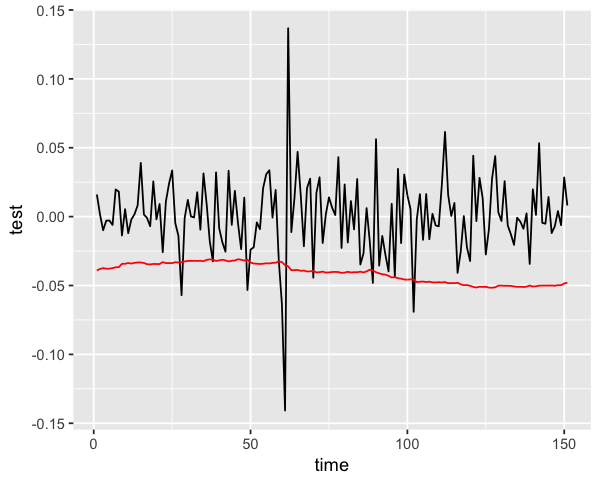

In [49]:
df_plot = data.frame(time = 1:length(test), test = test, VaR=VaR)

ggplot(df_plot, aes(x = time)) + 
    geom_line(aes(y = test)) + 
    geom_line(aes(y = VaR), color = 'red')

Надеюсь, что всё получилось ок. Сразу тест Купика.

In [50]:
L <- length(test)
K <- sum(test < VaR)
a0 <- K/L
a <- 0.05
S <- 2*log( (1-a0)^(L-K) * a0^K ) - 2*log( (1-a)^(L-K) * a^K )
pval <- 1 - pchisq(S, 1)
pval

[1] 0.8677764

Ваши выводы? 

## 6. И снова метод Монте-Карло

Зачем он то тут? А затем, что мы умеем находить $VaR$ для ОГР, но не $ES$. Ещё раз $VaR$: 

In [51]:
qghyp(0.05, object = aic$best.model)

[1] -0.04123836

А теперь $ES$. Генерим дофига огромную выборку и смотрим какие именно потери попали в хвост. Считаем среднее по этим потерям. 

In [52]:
N = 10^6 # Количество точек для Монте-Карло.
mean(sort(rghyp(N, object = aic$best.model))[1:N*0.05])

Warning message in rt(n, df = nu) * sqrt((nu - 2)/nu) * object@sigma:
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”

[1] -0.0600914

## Сухой остаток: 

На рынке много ценных бумаг. Хотелось бы перед инвестирвоанием измерить их риск. Можно делать это с помощью разных метрик. Одни из самых распространённых: $VaR$ и $ES$. 

$VaR$ - выраженная в деньгах оценка величины, которую не превысят ожидаемые в течении данного периода потери с заданной вероятностью, то есть: 

$$
P(X < VaR_{1-\alpha}) = 1 - \alpha.
$$

Говоря нормлаьным языком, это квантиль уровня $1-\alpha$ для наших потерь. 

Минусы меры: 

1. Это всего лишь квантиль, оцененный на онове наблюдаемой выборки. 
2. Ссылаясь на VaR, как на максимальную потер, мы ожидаем две или три крупные потери за год. Однако ряд из прошлых значений модет не включать многие негативные события. 
3. Показывает нетипичный, экстримальный уровень потерь 

$$
ES_{1-\alpha} = E(X \mid X<VaR_{1-\alpha})
$$

В отличие от $VaR$ показывает, что скорее всего произойдёт при реализации потерь. 

Для тестирования качества оценок риска используется кривая VaR - набор последовательных во времени значений VaR. Достоверность оценки проверяется на тестовом периоде с помощью теста Купика. 

# Авторские права и почиташки 

Курс Ильи Езепова по рискам и всяким другим прикольным штукам в R. На самом деле, вы ещё не готовы к этому курсу. 
Для того, чтобы успешно его освоить, надо уметь хорошо проверять гипотезы, а также немного подучить эконометрику. 

Однако, вы смело можете попробовать ознакомиться с лекцией 1, лекцией 2 и лекцией 5. Материалы из них я использовал для создания этой тетрадки. Иногда вплоть до копипасты. 

* [Лекция 1 - вводная](https://rpubs.com/iezepov/e502lec1)
* [Лекция 2 - кривая VaR, пакет ghyp и Монте-Карло](https://rpubs.com/iezepov/e502lec2)
* [Лекция 3 - разговоры о волатильности, GARCH и ARCH модели. ](https://rpubs.com/iezepov/e502lec3)
* [Лекция 4 - инвестируем в портфель и изучаем копулы.](https://rpubs.com/iezepov/e502lec4)
* [Лекция 5 - много разных картинок.](https://rpubs.com/iezepov/e502lec5)
* [Лекция 6 - моделирование хвостов и непараметрические оценки.](https://rpubs.com/iezepov/e502lec6)
* [Лекция 7 - PCA, факторный анализ, кластеризация и многое другое.](https://rpubs.com/iezepov/e502lec7)
* [Лекция 8 - Временные ряды и панельные данные в R](https://rpubs.com/iezepov/e502lec8) 

Пусть ссылки на все эти лекции лежат тут. Когда вы морально будете готовы вникнуть в них, читайте! :) Кстатит говоря, если хотите погрузится в финансовый мир не так резко, как мы это сделали сегодня, прочтите книгу Кванты и книгу Хулиганская экономика.